In [25]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added project root to path: {project_root}")

In [28]:
from src.environment import PricingEnvironment
from src.epsilon_greedy import EpsilonGreedyAgent

# === 1. Setup the Simulation Environment ===

# Define possible prices (arms)
price_points = np.linspace(10, 100, 10)  # 10 possible prices

In [31]:
# Calculate the Ground Truth (Hidden from the Agent)
true_expected_demand = 200 - 3 * price_points
true_expected_revenue = price_points * true_expected_demand
true_optimal_index = np.argmax(true_expected_revenue)
true_optimal_price = price_points[true_optimal_index]
true_max_revenue = true_expected_revenue[true_optimal_index]

print("--- Ground Truth (Hidden from Agent) ---")
print(f"True Optimal Price: ${true_optimal_price:.2f}")
print(f"True Max Expected Revenue: ${true_max_revenue:.2f}\n")

--- Ground Truth (Hidden from Agent) ---
True Optimal Price: $30.00
True Max Expected Revenue: $3300.00



Running simulations...

--- Results for n_rounds = 50 ---
Learned Optimal Price: $30.00
Estimated Mean Revenue: $3313.54
Result: CORRECTLY found the true optimal price.


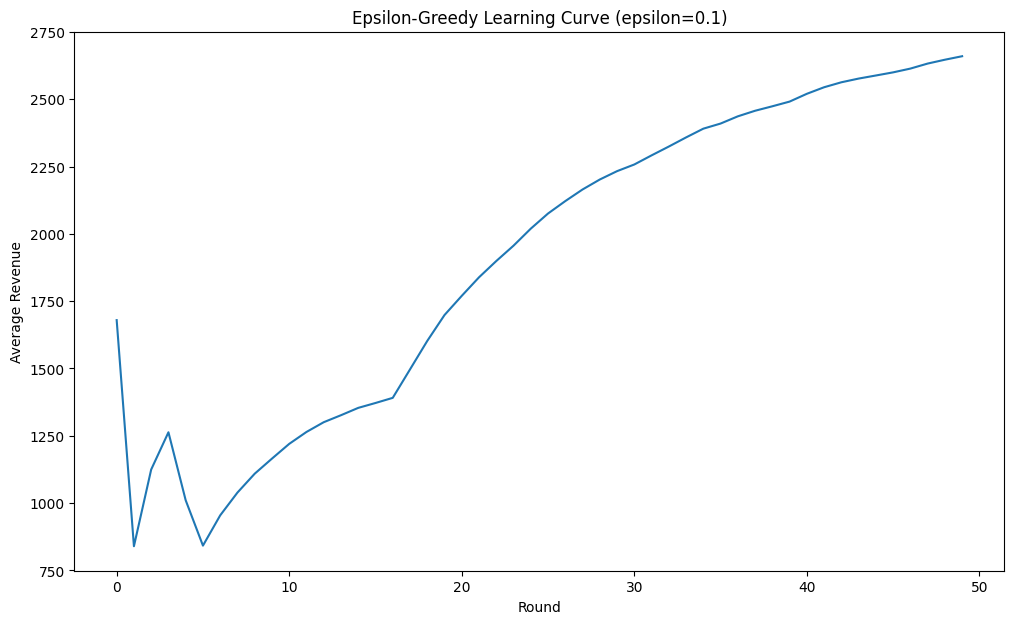

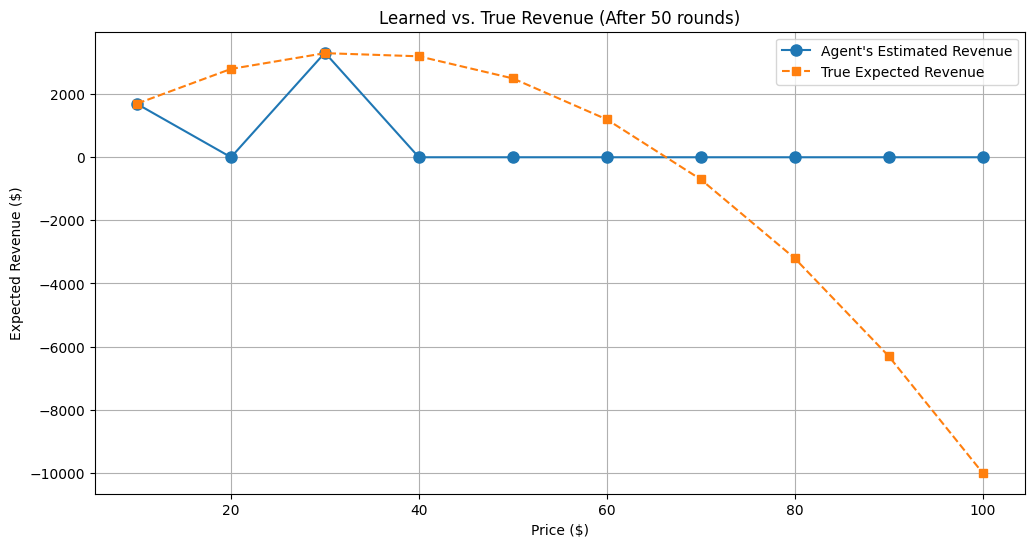

C:\Users\LOQ\AppData\Local\Temp\ipykernel_26572\572996160.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_labels, y=agent.counts, palette='viridis')


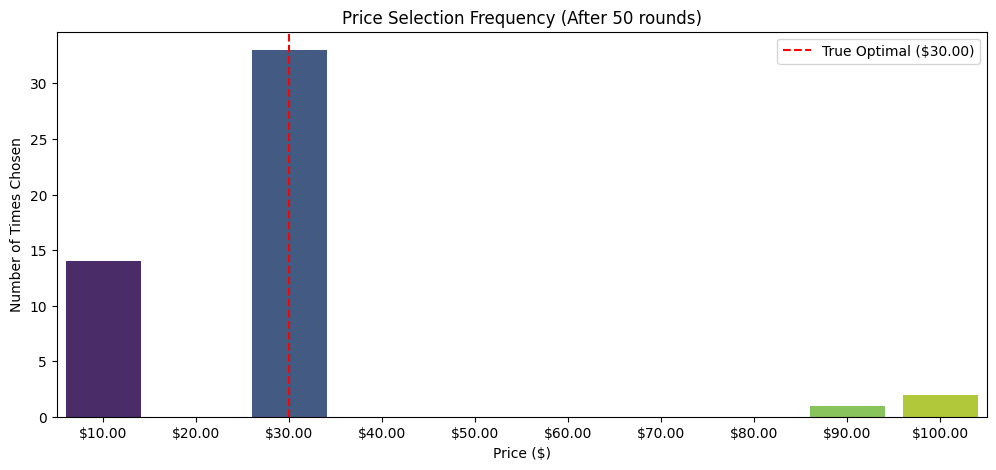

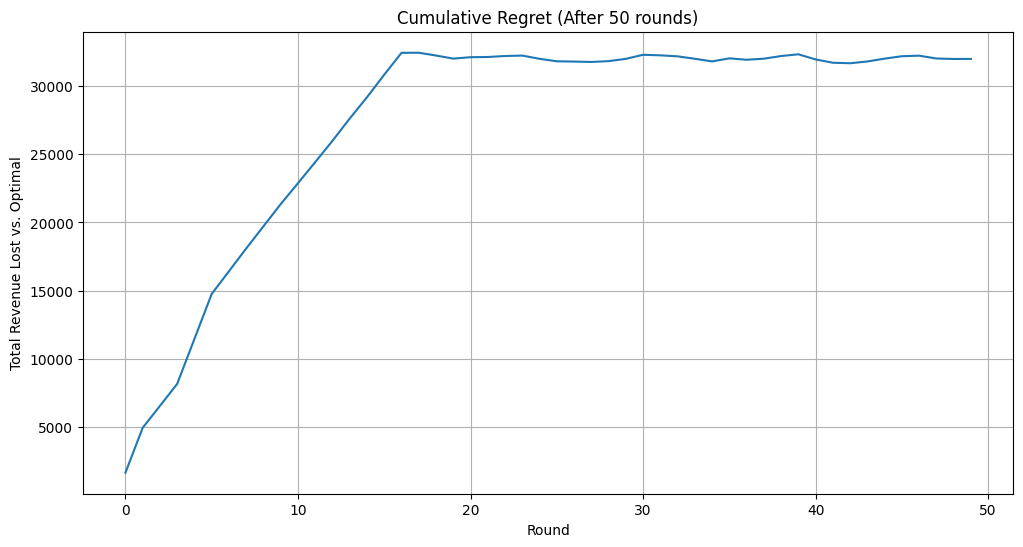


--- Results for n_rounds = 100 ---
Learned Optimal Price: $30.00
Estimated Mean Revenue: $3475.29
Result: CORRECTLY found the true optimal price.


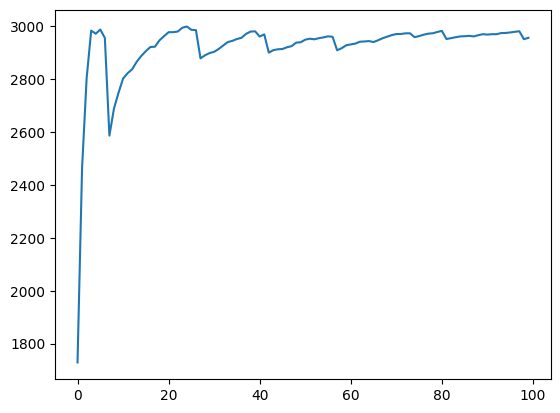

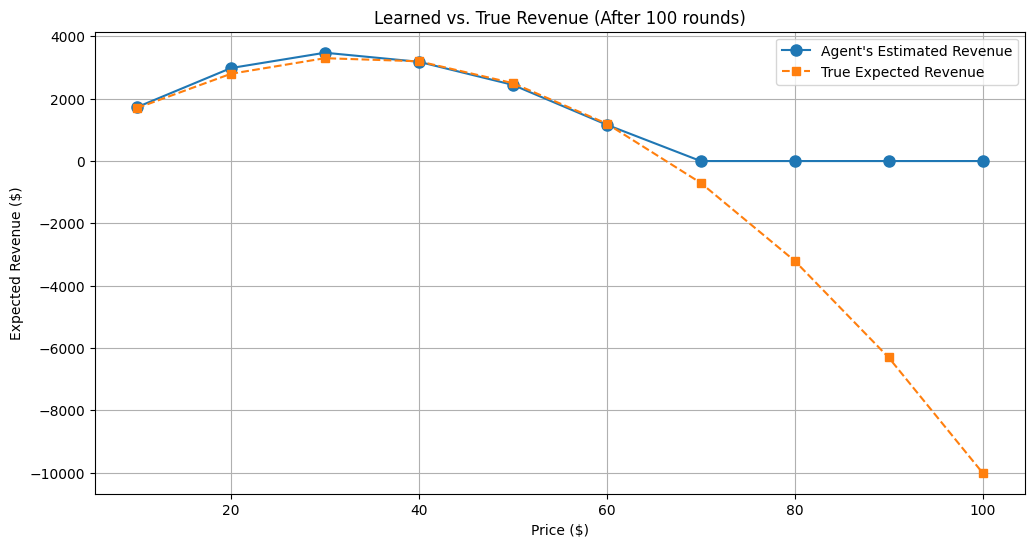

C:\Users\LOQ\AppData\Local\Temp\ipykernel_26572\572996160.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_labels, y=agent.counts, palette='viridis')


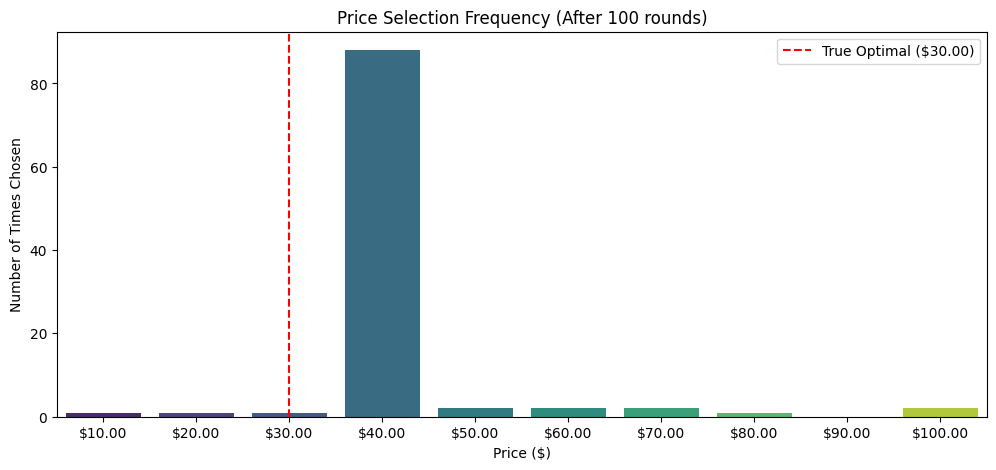

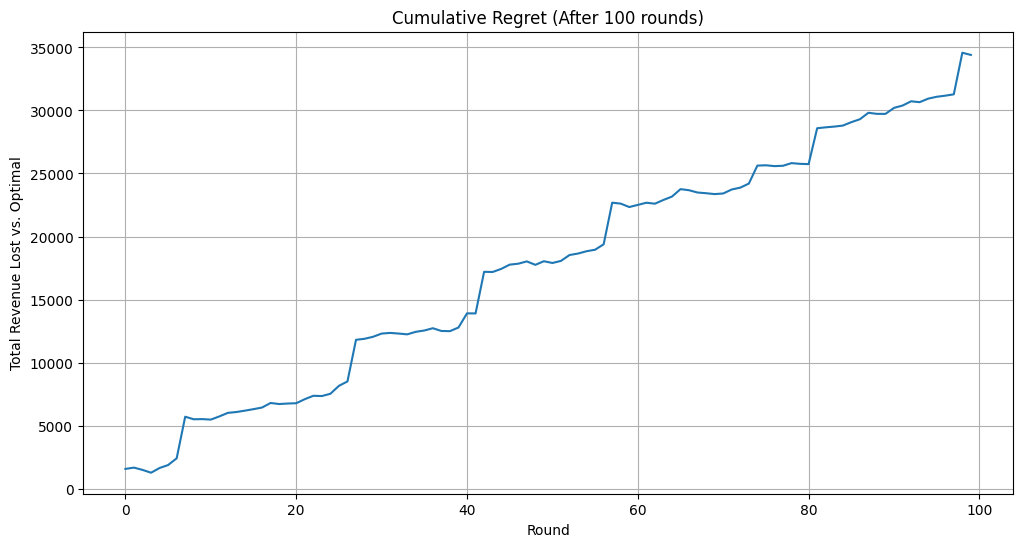


--- Results for n_rounds = 200 ---
Learned Optimal Price: $30.00
Estimated Mean Revenue: $3247.61
Result: CORRECTLY found the true optimal price.


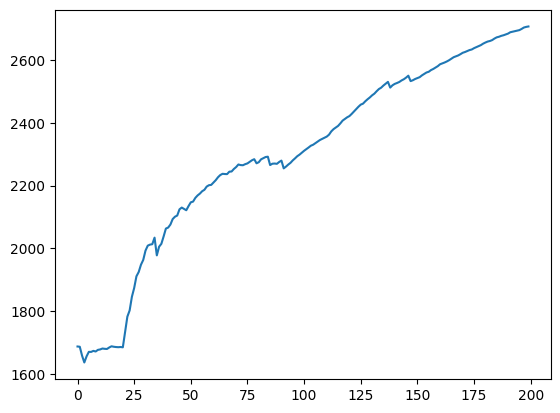

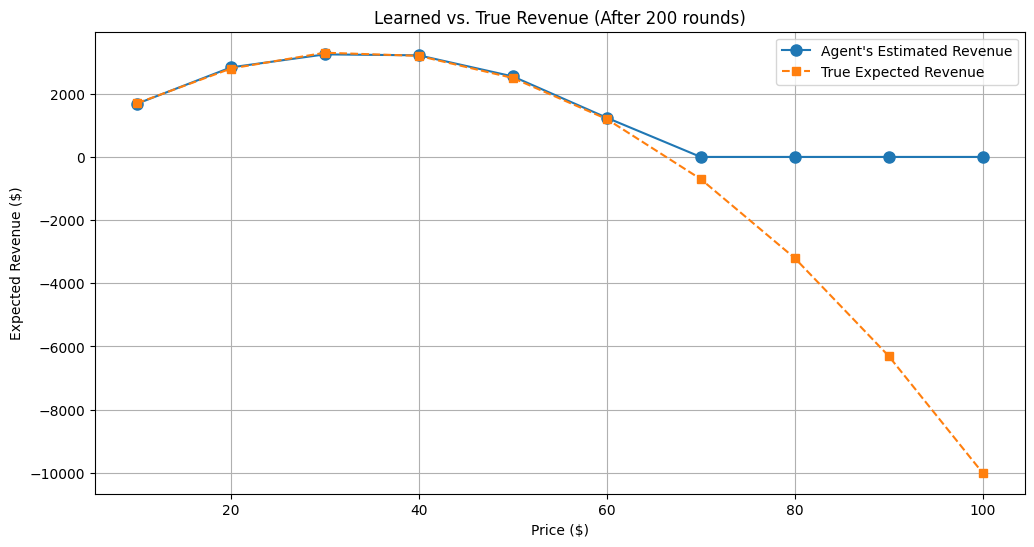

C:\Users\LOQ\AppData\Local\Temp\ipykernel_26572\572996160.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_labels, y=agent.counts, palette='viridis')


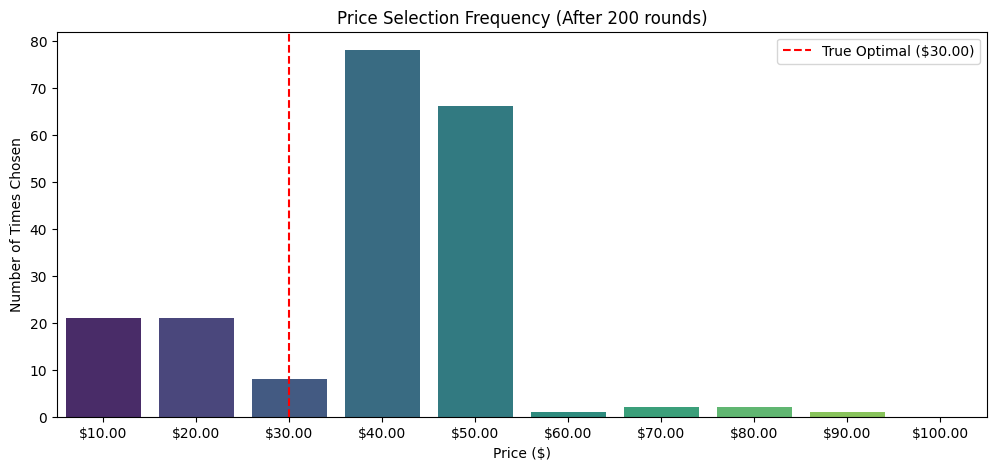

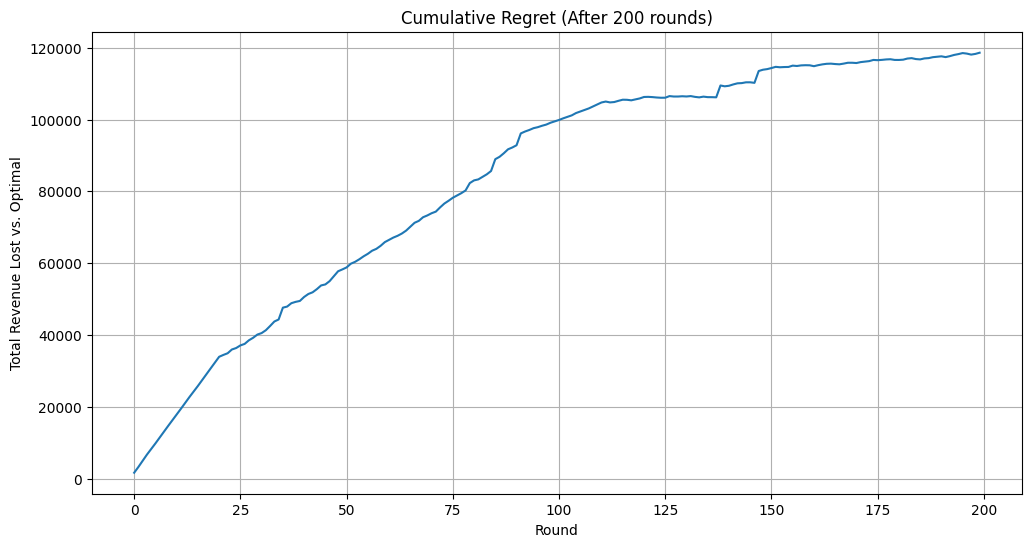


--- Results for n_rounds = 1000 ---
Learned Optimal Price: $30.00
Estimated Mean Revenue: $3298.15
Result: CORRECTLY found the true optimal price.


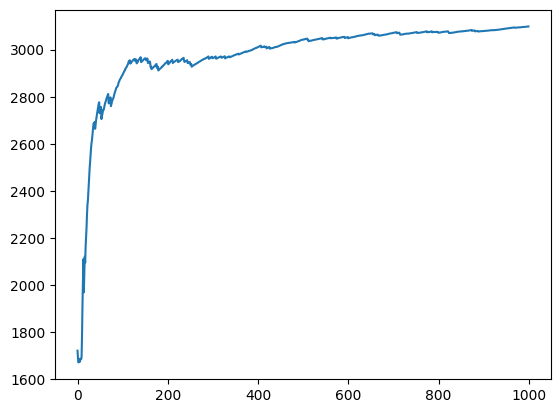

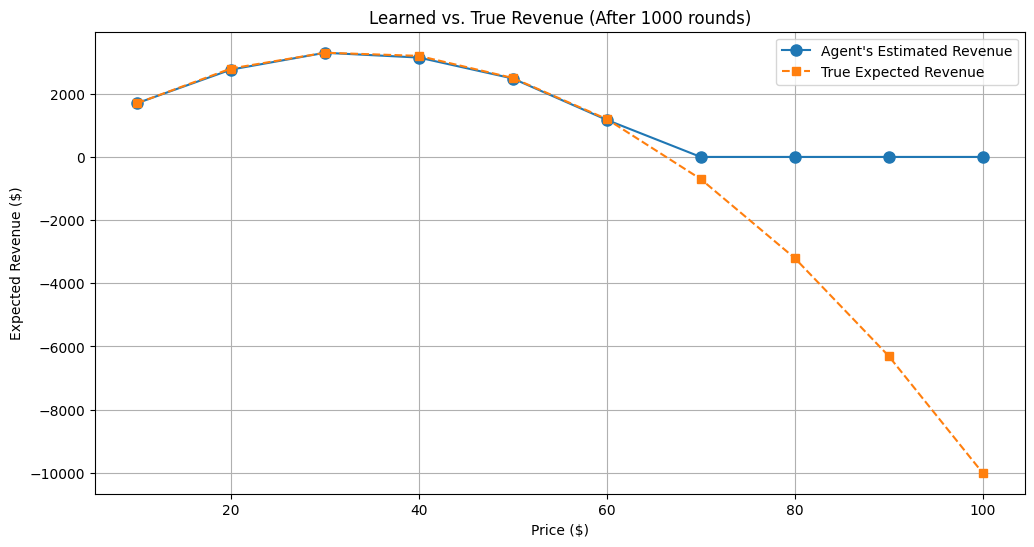

C:\Users\LOQ\AppData\Local\Temp\ipykernel_26572\572996160.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_labels, y=agent.counts, palette='viridis')


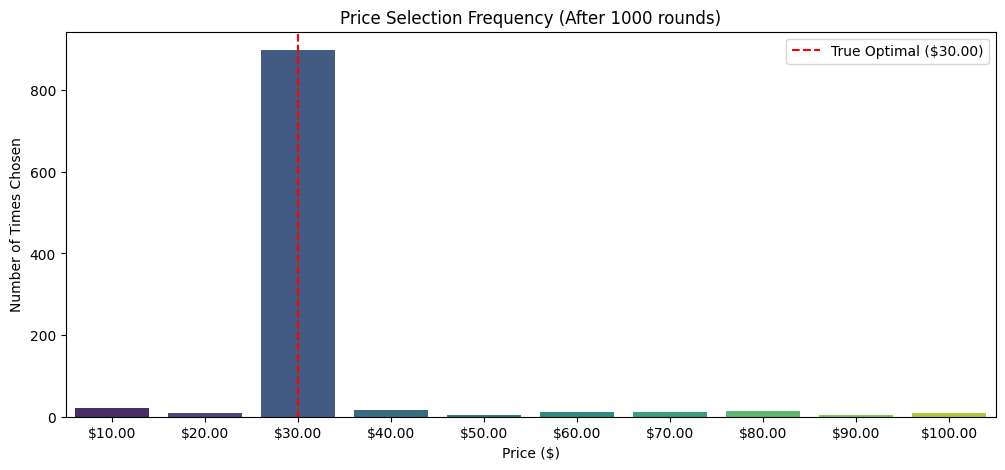

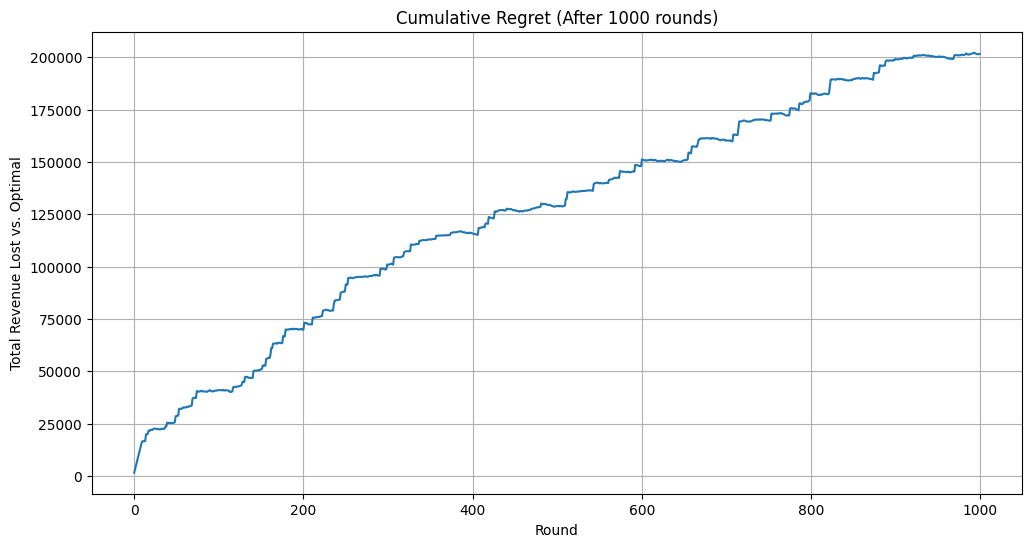

In [32]:
# 2. Run the Simulations

# Define the n_rounds we want to test
rounds_to_test = [50, 100, 200, 1000]
epsilon_val = 0.1  # Keep epsilon constant

# This figure will hold the original "Learning Curve" plot
plt.figure(figsize=(12, 7))
plt.title(f'Epsilon-Greedy Learning Curve (epsilon={epsilon_val})')
plt.xlabel('Round')
plt.ylabel('Average Revenue')

print("Running simulations...")

# Loop over each n_rounds value
for n_rounds in rounds_to_test:
    
    # CRITICAL: Re-initialize the agent for each new simulation
    env = PricingEnvironment(price_points)
    agent = EpsilonGreedyAgent(n_arms=len(price_points), epsilon=epsilon_val)

    rewards = np.zeros(n_rounds)
    instant_regrets = np.zeros(n_rounds) # <-- NEW: To store regret for each round
    
    for t in range(n_rounds):
        arm = agent.select_arm()
        reward = env.get_reward(arm)
        agent.update(arm, reward)
        rewards[t] = reward
        
        # <-- NEW: Calculate and store the "regret" for this round
        # Regret = (Revenue from Optimal Price) - (Revenue from Chosen Price)
        instant_regret = true_max_revenue - reward
        instant_regrets[t] = instant_regret

    # --- Plot 1: Learning Curve (Original Plot) ---
    avg_rewards = np.cumsum(rewards) / (np.arange(n_rounds) + 1)
    plt.plot(avg_rewards, label=f'n_rounds = {n_rounds}')

    # --- Print the final result for this n_rounds ---
    optimal_index = np.argmax(agent.values)
    optimal_price = price_points[optimal_index]
    estimated_revenue = agent.values[optimal_index]
    
    print(f"\n--- Results for n_rounds = {n_rounds} ---")
    print(f"Learned Optimal Price: ${optimal_price:.2f}")
    print(f"Estimated Mean Revenue: ${estimated_revenue:.2f}")
    
    if optimal_price == true_optimal_price:
        print(f"Result: CORRECTLY found the true optimal price.")
    else:
        print(f"Result: INCORRECTLY converged to ${optimal_price:.2f}")

    # === 3. NEW PLOT 1: What did the agent learn? ===
    # Compare the agent's final estimates to the ground truth
    
    plt.figure(figsize=(12, 6))
    plt.plot(price_points, agent.values, 'o-', label="Agent's Estimated Revenue", markersize=8)
    plt.plot(price_points, true_expected_revenue, 's--', label="True Expected Revenue")
    plt.title(f"Learned vs. True Revenue (After {n_rounds} rounds)")
    plt.xlabel("Price ($)")
    plt.ylabel("Expected Revenue ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # === 4. NEW PLOT 2: Which price did it choose? ===
    # Show the frequency of each arm (price) being pulled
    
    plt.figure(figsize=(12, 5))
    # Create a clean list of price strings for the x-axis labels
    price_labels = [f"${p:.2f}" for p in price_points]
    
    ax = sns.barplot(x=price_labels, y=agent.counts, palette='viridis')
    ax.set_title(f"Price Selection Frequency (After {n_rounds} rounds)")
    ax.set_xlabel("Price ($)")
    ax.set_ylabel("Number of Times Chosen")
    
    # Add a red line to show where the true optimal price is
    ax.axvline(x=true_optimal_index, color='red', linestyle='--', label=f'True Optimal (${true_optimal_price:.2f})')
    ax.legend()
    plt.show()

    # === 5. NEW PLOT 3: How much revenue did we "lose" by exploring? ===
    # Plot the cumulative regret
    
    cumulative_regret = np.cumsum(instant_regrets)
    
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_regret)
    plt.title(f"Cumulative Regret (After {n_rounds} rounds)")
    plt.xlabel("Round")
    plt.ylabel("Total Revenue Lost vs. Optimal")
    plt.grid(True)
    plt.show()


